# Set Up Env

In [ ]:
import torch
import tqdm as notebook_tqdm
import torchvision
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting beautiful graphs

# train test split from sklearn
from sklearn.model_selection import train_test_split

# Import Torch 
import torch
import torch.nn as nn
from torchvision import transforms, models
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F
import os
# print(os.listdir("./dataset"))

d:\MBKM\Start up campus\ML\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("device : ",device)

device :  cpu


# Load data

In [ ]:
# initializer shape
input_size=784   #28X28 pixel of image
hidden_size1=200 #size of 1st hidden layer(number of perceptron)
hidden_size2=150 #size of second hidden layer
hidden_size3=100 #size of third hidden layer
hidden_size=80   #size of fourth hidden layer
output =10       #output layer
batch_size=100

In [ ]:
train_dataset=torchvision.datasets.MNIST('/dataset',train=True,
                                         transform=transforms.ToTensor(),
                                         download=True)
test_dataset=torchvision.datasets.MNIST('/dataset',train=False,     
              transform=transforms.ToTensor(),
              download=False)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

# Visualize several mnist dataset

In [ ]:
def visualize_image(data,pred=False, val=0):
    plt.imshow(data.reshape(28,28),cmap="gray",interpolation="none")
    plt.axis("off")
    plt.title("Handwritten Digit Image")
    plt.show()

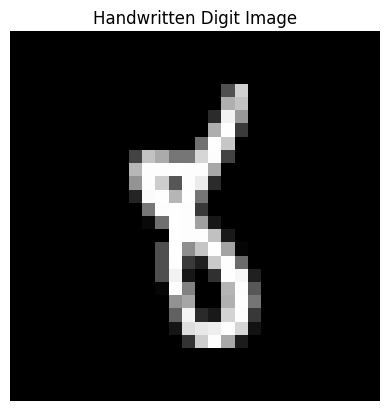

label:tensor(8)


In [ ]:
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
visualize_image(sample)
print("label:"+str(labels[0]))

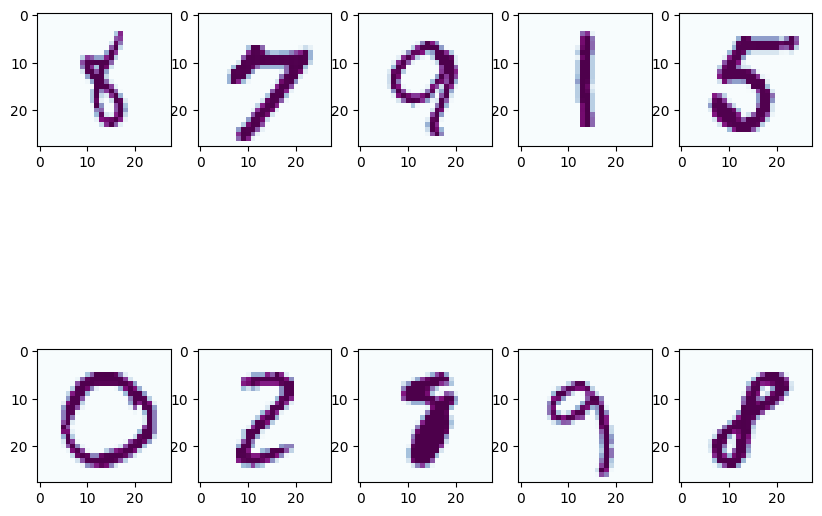

In [ ]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(example_datas[i][0],cmap='BuPu')
plt.show()

train

In [ ]:
_,(example_datas, labels) = next(enumerate(train_loader))
example_datas.shape

torch.Size([100, 1, 28, 28])

# Design your Neural Network model

In [ ]:
class MNIST(nn.Module):
        def __init__(self,input_size,hidden_size1,hidden_size2
                       ,hidden_size3,hidden_size,output):
                super(MNIST,self).__init__()
                self.f_connected1=nn.Linear(input_size,hidden_size1)
                self.f_connected2=nn.Linear(hidden_size1,hidden_size2)
                self.f_connected3=nn.Linear(hidden_size2,hidden_size3)
                self.f_connected4=nn.Linear(hidden_size3,hidden_size)
                self.out_connected=nn.Linear(hidden_size,output)
        def forward(self,x):
                out=F.relu(self.f_connected1(x)) 
                out=F.relu(self.f_connected2(out))
                out=F.relu(self.f_connected3(out))
                out=F.relu(self.f_connected4(out))
                out=self.out_connected(out)
                return out

# Setup your hyperparamter such as Loss Function, Optimizer, Learning Rate, etc

# 1. Loss Function CrossEntropyLoss

In [ ]:
## create model and optimizer
model_1 = MNIST(input_size,hidden_size1,hidden_size2
                       ,hidden_size3,hidden_size,output)
loss = nn.CrossEntropyLoss()
learning_rate = 0.1
momentum = 0.00003
device = "cpu"
optimizer = optim.SGD(model_1.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
model_1.parameters

<bound method Module.parameters of MNIST(
  (f_connected1): Linear(in_features=784, out_features=200, bias=True)
  (f_connected2): Linear(in_features=200, out_features=150, bias=True)
  (f_connected3): Linear(in_features=150, out_features=100, bias=True)
  (f_connected4): Linear(in_features=100, out_features=80, bias=True)
  (out_connected): Linear(in_features=80, out_features=10, bias=True)
)>

# Develop a training loop and run training model


In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        # forward pass
        output = model_1(images)
        Loss=loss(output,labels)
        # backward pass
        optimizer.zero_grad() # tidak kalkulasi gradient result setiap epoch
        Loss.backward() # kalkulasi backward progation methode (estimasi loss function setiap weights)
        optimizer.step() # update parameter setiap iterasi
        
        if (i+1) %100 ==0:
            print(f"epoch = {epoch+1}/{num_epochs},step = {i+1} / {len(train_loader)}, loss={Loss.item()}")

epoch = 1/10,step = 100 / 600, loss=2.2844343185424805
epoch = 1/10,step = 200 / 600, loss=1.7697703838348389
epoch = 1/10,step = 300 / 600, loss=1.0721518993377686
epoch = 1/10,step = 400 / 600, loss=0.5331020951271057
epoch = 1/10,step = 500 / 600, loss=0.3618559241294861
epoch = 1/10,step = 600 / 600, loss=0.3051614463329315
epoch = 2/10,step = 100 / 600, loss=0.3381228744983673
epoch = 2/10,step = 200 / 600, loss=0.32396915555000305
epoch = 2/10,step = 300 / 600, loss=0.252672016620636
epoch = 2/10,step = 400 / 600, loss=0.2384522259235382
epoch = 2/10,step = 500 / 600, loss=0.07172219455242157
epoch = 2/10,step = 600 / 600, loss=0.14541637897491455
epoch = 3/10,step = 100 / 600, loss=0.12199241667985916
epoch = 3/10,step = 200 / 600, loss=0.17821477353572845
epoch = 3/10,step = 300 / 600, loss=0.07040245831012726
epoch = 3/10,step = 400 / 600, loss=0.1255968064069748
epoch = 3/10,step = 500 / 600, loss=0.15721462666988373
epoch = 3/10,step = 600 / 600, loss=0.11662329733371735
epo

In [ ]:
Loss.item()

0.009841200895607471

# Evaluate Model using several performance metrics suach as accuracy, confusion matrix, F1Score, Precision, Recall, etc

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,784)
        output=model_1(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
        cm = (confusion_matrix(labels, prediction)) 
    accuracy=(n_correct/n_samples)*100
    precision = (cm[0][0]/((cm[1][0])+(cm[2][0])+(cm[0][0]))) *100
    recall = (cm[1][1]/((cm[1][0])+(cm[1][1])+(cm[1][2]))) *100
    f1 =(2 * ((precision * recall )/ (precision + recall))) *100
    print("Accuracy : ",accuracy)
    print("Precision :", precision)
    print("Recall :",recall)
    print("F1 : ",f1)
    print("\n")
    print("Confusion matriks : \n\n",cm,"\n")

Accuracy :  99.0
Precision : 100.0
Recall : 100.0
F1 :  10000.0


Confusion matriks : 

 [[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  1  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 13]] 



In [ ]:
# predicted result
predicted=[]
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,784)
        output=model_1(images) #applying the model we have built
        labels=labels
        _,prediction=torch.max(output,1)
        predicted.append(prediction)
print(prediction)

tensor([0, 3, 0, 3, 2, 0, 0, 0, 2, 9, 9, 7, 1, 1, 2, 8, 6, 2, 0, 7, 7, 6, 6, 6,
        2, 0, 4, 3, 1, 1, 3, 8, 5, 1, 2, 7, 7, 8, 5, 4, 3, 8, 9, 5, 2, 8, 8, 1,
        6, 7, 6, 7, 5, 4, 0, 2, 8, 4, 0, 9, 7, 0, 9, 7, 2, 6, 8, 9, 2, 5, 0, 3,
        9, 5, 8, 0, 1, 3, 1, 5, 7, 2, 0, 2, 2, 5, 8, 6, 1, 7, 1, 6, 8, 3, 5, 6,
        1, 2, 1, 8])


# 2. Loss function NLLLoss()

In [ ]:
## create model and optimizer
loss = nn.NLLLoss()
learning_rate = 0.1
momentum = 0.00003
device = "cpu"
optimizer = optim.SGD(model_1.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        # forward pass
        output = model_1(images)
        Loss=loss(output,labels)
        # backward pass
        optimizer.zero_grad() # tidak kalkulasi gradient result setiap epoch
        Loss.backward() # kalkulasi backward progation methode (estimasi loss function setiap weights)
        optimizer.step() # update parameter setiap iterasi
        
        if (i+1) %100 ==0:
            print(f"epoch = {epoch+1}/{num_epochs},step = {i+1} / {len(train_loader)}, loss={Loss.item()}")

epoch = 1/10,step = 100 / 600, loss=nan
epoch = 1/10,step = 200 / 600, loss=nan
epoch = 1/10,step = 300 / 600, loss=nan
epoch = 1/10,step = 400 / 600, loss=nan
epoch = 1/10,step = 500 / 600, loss=nan
epoch = 1/10,step = 600 / 600, loss=nan
epoch = 2/10,step = 100 / 600, loss=nan
epoch = 2/10,step = 200 / 600, loss=nan
epoch = 2/10,step = 300 / 600, loss=nan
epoch = 2/10,step = 400 / 600, loss=nan
epoch = 2/10,step = 500 / 600, loss=nan
epoch = 2/10,step = 600 / 600, loss=nan
epoch = 3/10,step = 100 / 600, loss=nan
epoch = 3/10,step = 200 / 600, loss=nan
epoch = 3/10,step = 300 / 600, loss=nan
epoch = 3/10,step = 400 / 600, loss=nan
epoch = 3/10,step = 500 / 600, loss=nan
epoch = 3/10,step = 600 / 600, loss=nan
epoch = 4/10,step = 100 / 600, loss=nan
epoch = 4/10,step = 200 / 600, loss=nan
epoch = 4/10,step = 300 / 600, loss=nan
epoch = 4/10,step = 400 / 600, loss=nan
epoch = 4/10,step = 500 / 600, loss=nan
epoch = 4/10,step = 600 / 600, loss=nan
epoch = 5/10,step = 100 / 600, loss=nan


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,784)
        output=model_1(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
        cm = (confusion_matrix(labels, prediction)) 
    accuracy=(n_correct/n_samples)*100
    precision = (cm[0][0]/((cm[1][0])+(cm[2][0])+(cm[0][0]))) *100
    recall = (cm[1][1]/((cm[1][0])+(cm[1][1])+(cm[1][2]))) *100
    f1 =(2 * ((precision * recall )/ (precision + recall))) *100
    print("Accuracy : ",accuracy)
    print("Precision :", precision_score(labels,prediction,average="weighted")*100) 
    print("Recall :",recall_score(labels,prediction,average="weighted")*100) 
    print("F1 : ",f1_score(labels,prediction,average="weighted")*100) 
    print("\n")
    print("Confusion matriks : \n\n",cm,"\n")

Accuracy :  14.000000000000002
Precision : 1.9600000000000002
Recall : 14.000000000000002
F1 :  3.43859649122807


Confusion matriks : 

 [[14  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]] 



d:\MBKM\Start up campus\ML\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Define our loss function
loss= nn.MultiMarginLoss()
# Define the optimier
learning_rate = 0.1
momentum = 0.00003
device = "cpu"
optimizer = optim.SGD(model_1.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        # forward pass
        output = model_1(images)
        Loss=loss(output,labels)
        # backward pass
        optimizer.zero_grad() # tidak kalkulasi gradient result setiap epoch
        Loss.backward() # kalkulasi backward progation methode (estimasi loss function setiap weights)
        optimizer.step() # update parameter setiap iterasi
        
        if (i+1) %100 ==0:
            print(f"epoch = {epoch+1}/{num_epochs},step = {i+1} / {len(train_loader)}, loss={Loss.item()}")

epoch = 1/10,step = 100 / 600, loss=0.0
epoch = 1/10,step = 200 / 600, loss=0.0
epoch = 1/10,step = 300 / 600, loss=0.0
epoch = 1/10,step = 400 / 600, loss=0.0
epoch = 1/10,step = 500 / 600, loss=0.0
epoch = 1/10,step = 600 / 600, loss=0.0
epoch = 2/10,step = 100 / 600, loss=0.0
epoch = 2/10,step = 200 / 600, loss=0.0
epoch = 2/10,step = 300 / 600, loss=0.0
epoch = 2/10,step = 400 / 600, loss=0.0
epoch = 2/10,step = 500 / 600, loss=0.0
epoch = 2/10,step = 600 / 600, loss=0.0
epoch = 3/10,step = 100 / 600, loss=0.0
epoch = 3/10,step = 200 / 600, loss=0.0
epoch = 3/10,step = 300 / 600, loss=0.0
epoch = 3/10,step = 400 / 600, loss=0.0
epoch = 3/10,step = 500 / 600, loss=0.0
epoch = 3/10,step = 600 / 600, loss=0.0
epoch = 4/10,step = 100 / 600, loss=0.0
epoch = 4/10,step = 200 / 600, loss=0.0
epoch = 4/10,step = 300 / 600, loss=0.0
epoch = 4/10,step = 400 / 600, loss=0.0
epoch = 4/10,step = 500 / 600, loss=0.0
epoch = 4/10,step = 600 / 600, loss=0.0
epoch = 5/10,step = 100 / 600, loss=0.0


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,784)
        output=model_1(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
        cm = (confusion_matrix(labels, prediction)) 
    accuracy=(n_correct/n_samples)*100
    precision = (cm[0][0]/((cm[1][0])+(cm[2][0])+(cm[0][0]))) *100
    recall = (cm[1][1]/((cm[1][0])+(cm[1][1])+(cm[1][2]))) *100
    f1 =(2 * ((precision * recall )/ (precision + recall))) *100
    print("Accuracy : ",accuracy)
    print("Precision :", precision_score(labels,prediction,average="weighted")*100) 
    print("Recall :",recall_score(labels,prediction,average="weighted")*100) 
    print("F1 : ",f1_score(labels,prediction,average="weighted")*100) 
    print("\n")
    print("Confusion matriks : \n\n",cm,"\n")

Accuracy :  5.0
Precision : 0.25
Recall : 5.0
F1 :  0.47619047619047616


Confusion matriks : 

 [[ 5  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]] 



d:\MBKM\Start up campus\ML\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pada hasil perbandingan loss function yang digunakan yang mana menghasilkan sebuah hasil terbaik dari ketiga proses yakni menggunakan cross entropy dengan hasil akurasi adalah 99%, precision 100% dan recal 100% dibandingkan dengan menggunakan NLLoss dan MultiMarginLoss yang seharusnya tidak cocok untuk loss function dalam kasus multiClassification